In [55]:
%load_ext autoreload
%autoreload 2

import numpy as np
import sys, glob, copy, os
#[sys.path.append(f) for f in glob.glob('../utils/*')]
from utils.plotting.plotting_utils import figSize
from utils.simulation import simulation_utils
from utils.preprocessing import sweep_utils

import stabilizer_utils
from stabilizer_utils import Stabilizer
from hmm import HMMRecalibration
import hmm_utils

from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib as mpl

import utils.plotting.plotting_utils

# for a reproducible result
np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Visualize hyperparameter search results



593 files. Missing: []


/tmp/ipykernel_2380/3249183595.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores_dict['ttt'] *= 2 # accidentally saved 0.5 x trial times; quick fix here
/tmp/ipykernel_2380/3249183595.py:96: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data = scores_subset, x = var, y = 'ttt', palette = palette, alpha = 0.6)
/tmp/ipykernel_2380/3249183595.py:113: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([2, 10], minor=True)
/tmp/ipykernel_2380/3249183595.py:96: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data = scores_subset, x = var, y = 'ttt', palette = palette, alpha = 0.6)
/tmp/ipykernel_2380/3249183595.py:96:

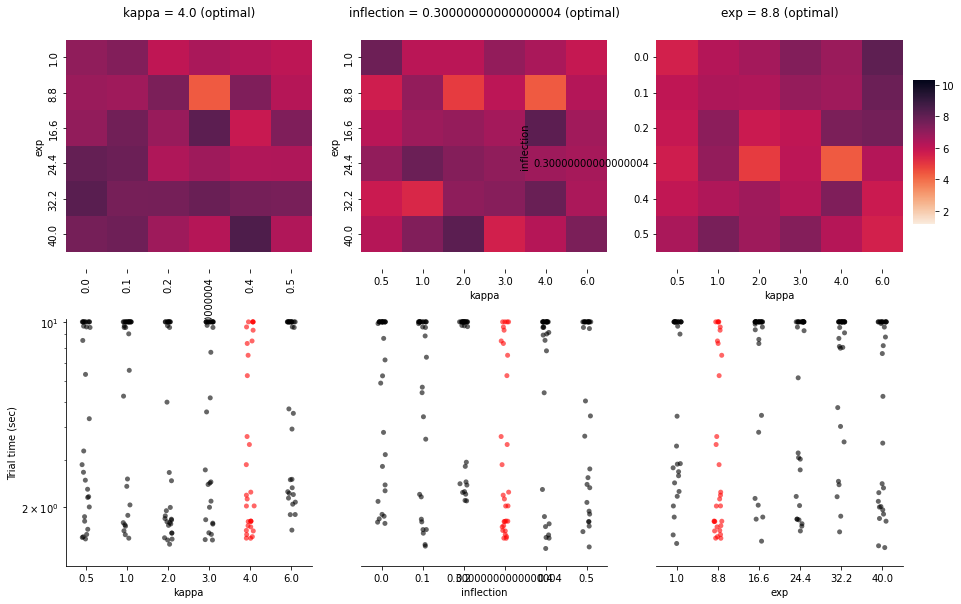

/tmp/ipykernel_2380/3249183595.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores_dict['ttt'] *= 2 # accidentally saved 0.5 x trial times; quick fix here
/tmp/ipykernel_2380/3249183595.py:96: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data = scores_subset, x = var, y = 'ttt', palette = palette, alpha = 0.6)
/tmp/ipykernel_2380/3249183595.py:113: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([2, 10], minor=True)
/tmp/ipykernel_2380/3249183595.py:96: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data = scores_subset, x = var, y = 'ttt', palette = palette, alpha = 0.6)
/tmp/ipykernel_2380/3249183595.py:96:

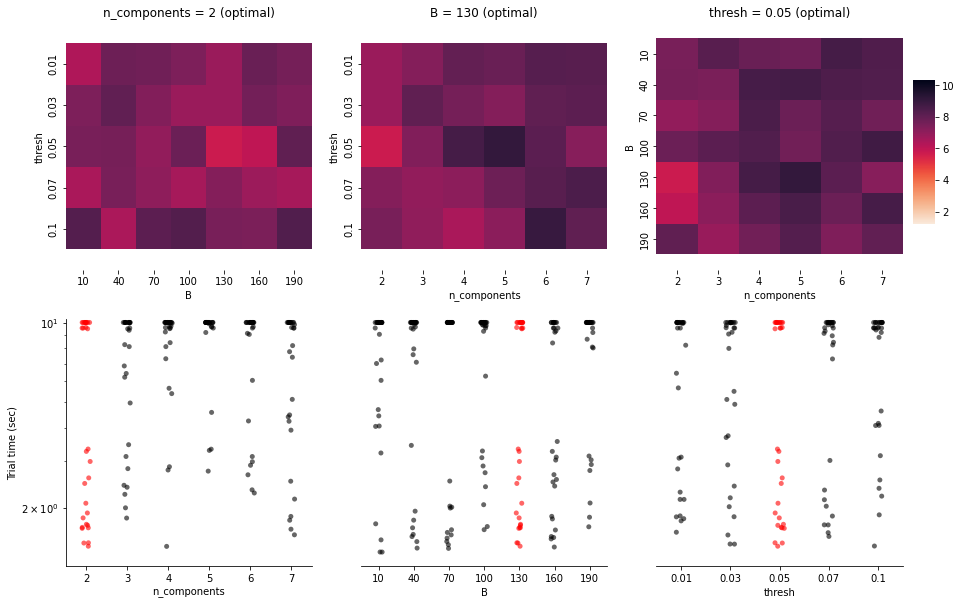

/tmp/ipykernel_2380/3249183595.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores_dict['ttt'] *= 2 # accidentally saved 0.5 x trial times; quick fix here
/tmp/ipykernel_2380/3249183595.py:96: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data = scores_subset, x = var, y = 'ttt', palette = palette, alpha = 0.6)
/tmp/ipykernel_2380/3249183595.py:113: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([2, 10], minor=True)
/tmp/ipykernel_2380/3249183595.py:96: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data = scores_subset, x = var, y = 'ttt', palette = palette, alpha = 0.6)
/tmp/ipykernel_2380/3249183595.py:96:

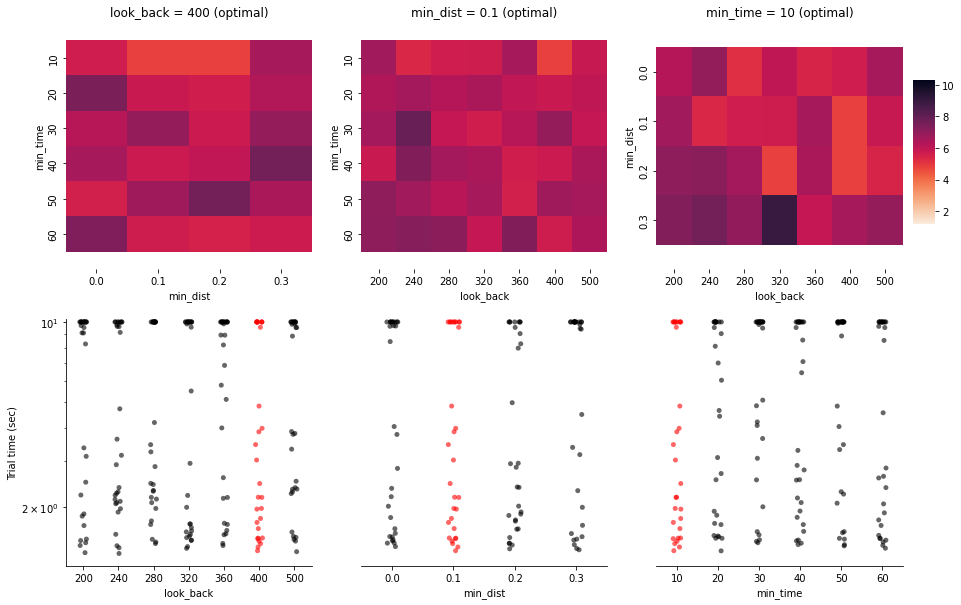

/tmp/ipykernel_2380/3249183595.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores_dict['ttt'] *= 2 # accidentally saved 0.5 x trial times; quick fix here
/tmp/ipykernel_2380/3249183595.py:96: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data = scores_subset, x = var, y = 'ttt', palette = palette, alpha = 0.6)
/tmp/ipykernel_2380/3249183595.py:113: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([2, 10], minor=True)
/tmp/ipykernel_2380/3249183595.py:96: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data = scores_subset, x = var, y = 'ttt', palette = palette, alpha = 0.6)
/tmp/ipykernel_2380/3249183595.py:96:

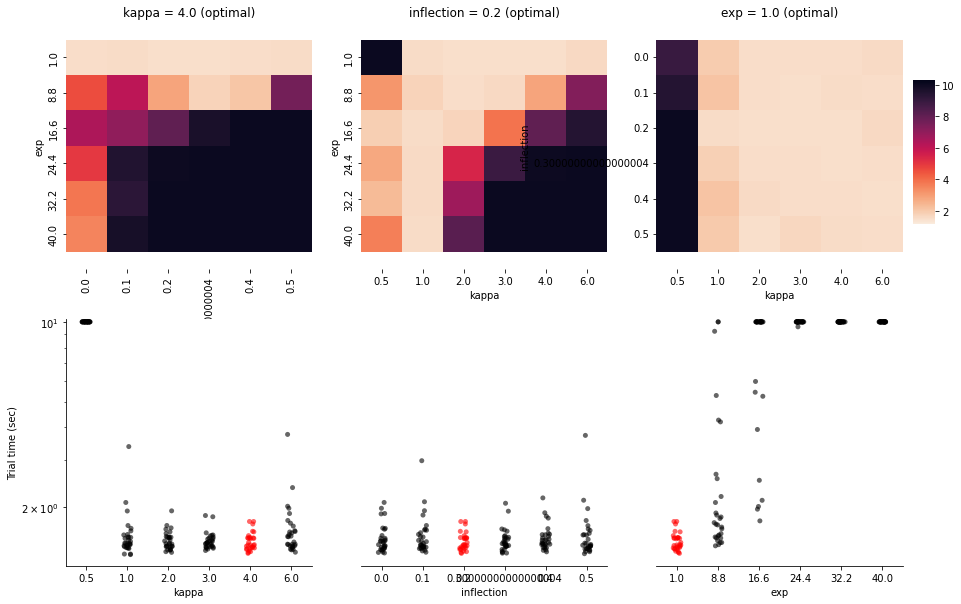

/tmp/ipykernel_2380/3249183595.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores_dict['ttt'] *= 2 # accidentally saved 0.5 x trial times; quick fix here
/tmp/ipykernel_2380/3249183595.py:96: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data = scores_subset, x = var, y = 'ttt', palette = palette, alpha = 0.6)
/tmp/ipykernel_2380/3249183595.py:113: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([2, 10], minor=True)
/tmp/ipykernel_2380/3249183595.py:96: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data = scores_subset, x = var, y = 'ttt', palette = palette, alpha = 0.6)
/tmp/ipykernel_2380/3249183595.py:96:

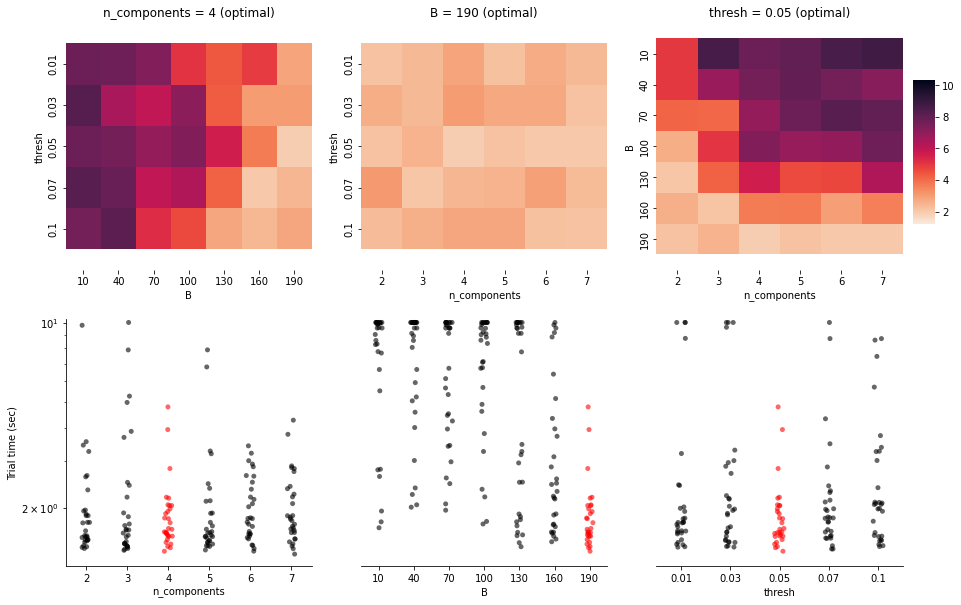

/tmp/ipykernel_2380/3249183595.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores_dict['ttt'] *= 2 # accidentally saved 0.5 x trial times; quick fix here
/tmp/ipykernel_2380/3249183595.py:96: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data = scores_subset, x = var, y = 'ttt', palette = palette, alpha = 0.6)
/tmp/ipykernel_2380/3249183595.py:113: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([2, 10], minor=True)
/tmp/ipykernel_2380/3249183595.py:96: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data = scores_subset, x = var, y = 'ttt', palette = palette, alpha = 0.6)
/tmp/ipykernel_2380/3249183595.py:96:

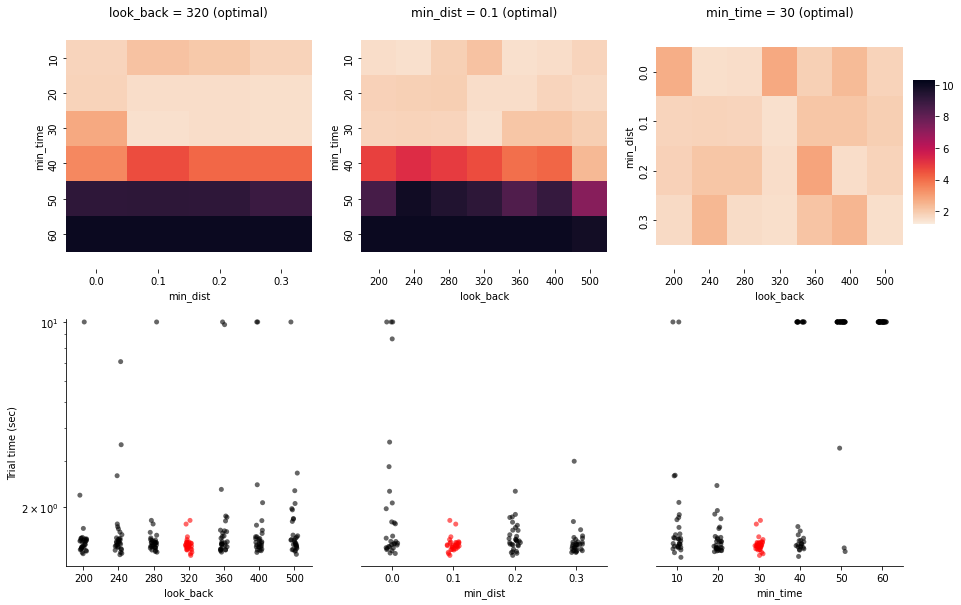

In [56]:
save_dir = '/oak/stanford/groups/henderj/ghwilson/nonstationarities/simulator/HP_sweeps/regular/'

# where to save figure files to
fig_path = '/home/users/ghwilson/projects/nonstationarities/figures/'

# y-axis limits for trial time plots
lims     = [1.2, 10.3]

# -------------------------------------------------------


files    = glob.glob(save_dir + '*')
IDs      = [int(x.split('scores_')[1].split('.npy')[0]) for x in files]
missing  = np.setdiff1d(np.arange(np.max(IDs) + 1), IDs)
print(np.max(IDs), 'files. Missing:', missing)


dicts = np.concatenate([np.load(x, allow_pickle = True) for x in files])

hmm_session_scores = pd.DataFrame([x for x in dicts if 'kappa' in x.keys()])
ss_session_scores  = pd.DataFrame([x for x in dicts if 'n_components' in x.keys()])
rti_session_scores = pd.DataFrame([x for x in dicts if 'look_back' in x.keys()])


for j, sweep_type in enumerate(['static', 'chained']):
    # subselect sweep data
    subset_hmm = hmm_session_scores[hmm_session_scores.chained == j]
    subset_ss  = ss_session_scores[ss_session_scores.chained == j]
    subset_rti = rti_session_scores[rti_session_scores.chained == j]
    scores_dfs = [subset_hmm, subset_ss, subset_rti]

    # get HP search settings from each method
    sweep_keys = [['kappa', 'inflection', 'exp'],
                  ['n_components', 'B', 'thresh'],
                  ['look_back', 'min_dist', 'min_time']]

    sweep_opts_list = [dict(), dict(), dict()]

    for keys, df, opts in zip(sweep_keys, scores_dfs, sweep_opts_list):
        for key in keys:
            opts[key] = np.unique(df[key])


    for fignum, (sweep_opts, scores_dict) in enumerate(zip(sweep_opts_list, scores_dfs)):
        scores_df = pd.DataFrame(scores_dict)
        
        scores_dict['ttt'] *= 2 # accidentally saved 0.5 x trial times; quick fix here

        scores_df['median ttt'] = scores_df.apply(lambda row: np.mean(row.ttt), axis=1)
        opt_vals = np.argmin(scores_df['median ttt'])

        opt_dict = dict()
        for key in sweep_opts.keys():
            opt_dict[key] = scores_df.iloc[opt_vals][key]

        if 'look_back' in opt_dict.keys():
            method = 'RTI'
        elif 'kappa' in opt_dict.keys():
            method = 'PRI-T'
        elif 'n_components' in opt_dict.keys():
            method = 'FA_stabilizer'
        else:
            raise ValueError('Method not found')

        figSize(10, 15)
        fig = plt.figure(fignum)
        cbar_ax = fig.add_axes([.91, .6, .02, .2])

        for i, var in enumerate(sweep_opts.keys()):

            var_opt  = scores_df.iloc[opt_vals][var]
            opt_idx  = np.where(sweep_opts[var] == var_opt)[0][0]

            opt_copy = dict(opt_dict)
            opt_copy.pop(var)

            plt.subplot(2, 3, i + 1)

            in_df = scores_df[scores_df[var] == var_opt]
            df_m  = in_df.groupby([list(opt_copy.keys())[0], list(opt_copy.keys())[1]])['median ttt'].mean().unstack(level = 0)
            sns.heatmap(df_m, vmin = lims[0], vmax = lims[1], cmap = sns.cm.rocket_r,
                        cbar = i == 0, cbar_ax = None if i else cbar_ax)
            plt.title('{} = {} (optimal)'.format(var, var_opt))

            ax = plt.gca()
            bottom, top = ax.get_ylim()
            ax.set_ylim(bottom + 0.5, top - 0.5)

            plt.subplot(2, 3, i + 3 + 1)

            scores_subset = sweep_utils.get_subsetDF(scores_df.explode('ttt'), opt_copy)

            palette          = ['k'] * len(sweep_opts[var])
            palette[opt_idx] = 'r'

            sns.stripplot(data = scores_subset, x = var, y = 'ttt', palette = palette, alpha = 0.6)
            plt.ylim(lims)
            plt.yscale('log')
            
            ax = plt.gca()
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            
            if i > 0:
                ax.spines['left'].set_visible(False)
                sp.tick_params(left=False)
                plt.ylabel(None)
                ax.set_yticks([], minor=True)
                plt.yticks([])
            else:
                plt.ylabel('Trial time (sec)')
                ax.set_yticks([2, 10])
                ax.set_yticklabels([2, 10], minor=True)

            plt.legend([], [], frameon = False)
            

        save_fname = os.path.join(fig_path, 'simulator/HP_sweeps', f'hyperparameter_sweep_{method}_{sweep_type}')
        plt.savefig(save_fname, format = 'pdf')
        plt.show()
